# 00: Simulations for basic concepts in wooldridge 

## 01. Showing the meaning of unbiasedness using data

### 00. Code to load and install the necessary libraries

In [1]:
import wooldridge as wd  
import pandas as pd  
import numpy as np  
import statsmodels.api as sm  
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt  

### 01. Creating a fixed population and setting the parameter values
The PRF is given by $$ y = \beta_0 + \beta_1 x + u $$

Our explanatory variable follows a uniform distribution to avoid clustering around the mean. Error term is normally distributed following the OLS assumption that over large values, the error term is normally distributed. 

In [2]:
np.random.seed(42)  # For reproducibility
N = 100000  # Population size
beta_0 = 5  # True intercept
beta_1 = 2  # True slope
x_population = np.random.uniform(0, 10, N)  # Random x values
u_population = np.random.normal(0, 2, N)  # Error term with mean 0, variance 4
y_population = beta_0 + beta_1 * x_population + u_population  # Population regression function 

### 02. Running repeated sampling and storing the values

In [3]:
num_samples = 1000  # Number of samples to take
sample_size = 100  # Size of each sample
beta_1_estimates = []  # Store estimated beta_1 values

### 03. Running a loop to run the regression on each of the sample and storing the beta_1 values in the list

In [4]:
for _ in range(num_samples):
    sample_indices = np.random.choice(N, sample_size, replace=False)  # Random sample
    x_sample = x_population[sample_indices]
    y_sample = y_population[sample_indices]
    X_sample = sm.add_constant(x_sample)  # Add intercept term
    model = sm.OLS(y_sample, X_sample).fit()
    beta_1_estimates.append(model.params[1])  # Store estimated beta_1

### 04. Computing the mean of estimated values

In [5]:
mean_beta_1 = np.mean(beta_1_estimates)
print(f"True beta_1: {beta_1}, Mean estimated beta_1: {mean_beta_1}")

True beta_1: 2, Mean estimated beta_1: 2.0042903351532653


### 05. Visualizing the Beta Values

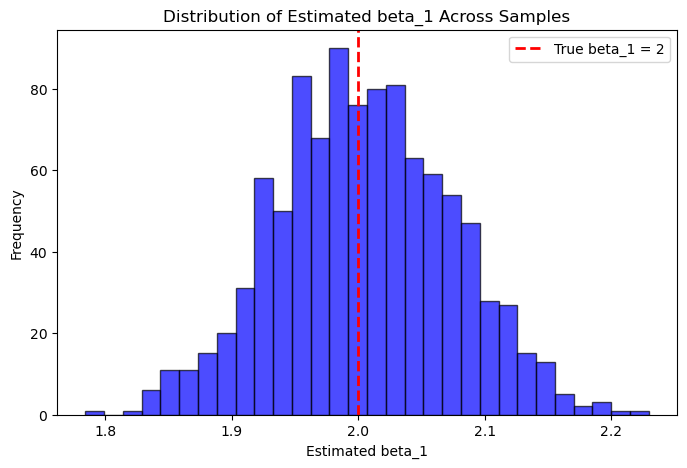

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(beta_1_estimates, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(beta_1, color='red', linestyle='dashed', linewidth=2, label=f'True beta_1 = {beta_1}')
plt.xlabel("Estimated beta_1")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated beta_1 Across Samples")
plt.legend()
plt.show()

### 06. Summary of the steps:
1. We first defined the population regression function (PRF) and set the number of observations in the population to 100,000.
2. Then, we set the slope and intercept as 2 and 5, respectively. This creates the y value, and accordingly synthetic data adjusts. 
3. Thus, we can change the values, and the property would still hold. 
4. Next, we take 1,000 samples of 100 each, and store the values of $ \hat{\beta}_1 $ that we get after running a regression on each sample in the list.
5. Finally, we take the average of the $ \hat{\beta}_1 $ and see how close it is to the population values

## 02. Violating the assumptions and practically understanding what happens to our model when the assumptions are violated

### 00. Loading the dataset

In [7]:
import seaborn as sns 
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna()

### 02. Running a multiple linear regression using two variables first.
The regression equation would be $$ \widehat{mpg} = \hat{\beta}_0 + \hat{\beta}_1 \cdot hpower + \hat{\beta}_2 \cdot weight $$ where $\hat{\beta}_1 $ gives us the impact of a unit increase in the horsepower on the fuel average, and $ \hat{\beta}_2 $ gives us the impact of a unit increase in engine weight on the fuel average of the vehicle.

In [8]:
# Select relevant variables
X = mpg[['horsepower', 'weight']]  # Independent variables
y = mpg['mpg']  # Dependent variable
# Adding a constant for the intercept
X = sm.add_constant(X)
# Run the regression
model = sm.OLS(y, X).fit()
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sat, 10 May 2025   Prob (F-statistic):          3.06e-104
Time:                        10:49:47   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

### 03. Violating the linearity assumption by making one of the coefficients quadratic, and running the following regression:
$$
\hat{mpg}_i = \hat{\beta}_0 + \hat{\beta}_1^2 \cdot horsepower_i + \hat{\beta}_2 \cdot weight_i + u_i
$$

                            OLS Regression Results                            
Dep. Variable:                mpg_mod   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     6389.
Date:                Sat, 10 May 2025   Prob (F-statistic):          3.23e-298
Time:                        10:50:29   Log-Likelihood:                -3468.4
No. Observations:                 392   AIC:                             6943.
Df Residuals:                     389   BIC:                             6955.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.226e+04    316.296    -38.752      0.0

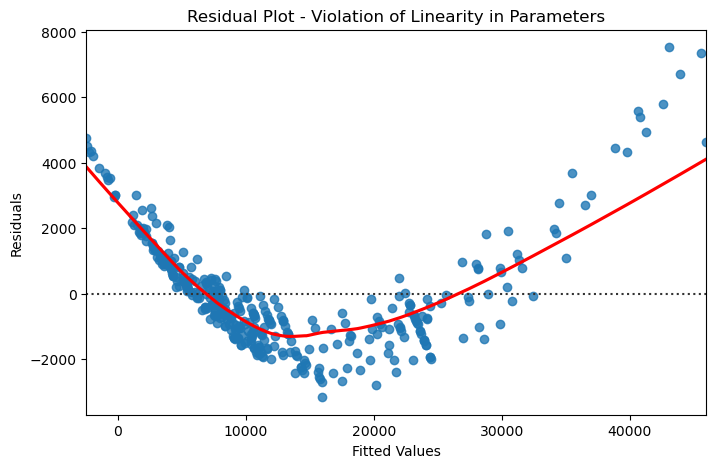

In [9]:
mpg['mpg_mod'] = mpg['horsepower']**2 + (-0.003 * mpg['weight']) + np.random.normal(0, 2, len(mpg))

# Define the incorrect OLS model (which assumes linearity in parameters)
X = mpg[['horsepower', 'weight']]
X = sm.add_constant(X)  # Add intercept
y = mpg['mpg_mod']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary results
print(model.summary())

# Plot residuals to check for patterns
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Violation of Linearity in Parameters")
plt.show()

As we can see, there are a number of problems that arise when the coefficient becomes non-linear:
1. $ R^2 $ has a massive jump, which shows that the model might be overfitting
2. The residual plot shows a curvy graph, which shows that the regression is no longer linear
3. Both the slope coefficients, as well as the intercept show a massive jump in their values, compared to the linear model, which show how distorted the estimators have become

### 04. Violating the random sampling assumption by filtering and selecting data.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.50e-33
Time:                        10:51:25   Log-Likelihood:                -348.08
No. Observations:                 150   AIC:                             702.2
Df Residuals:                     147   BIC:                             711.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5562      1.245     29.372      0.0

c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


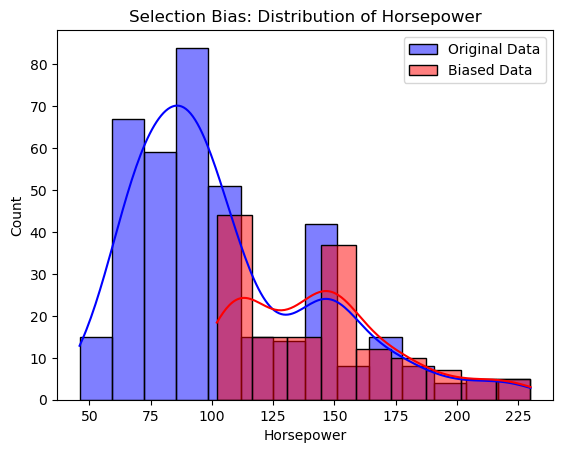

In [10]:
mpg_biased = mpg[mpg['horsepower'] > 100]

# Define independent (X) and dependent (y) variables
y_biased = mpg_biased['mpg']
X_biased = mpg_biased[['horsepower', 'weight']]
X_biased = sm.add_constant(X_biased)  # Add intercept

# Run OLS regression on biased sample
model_biased = sm.OLS(y_biased, X_biased).fit()
print(model_biased.summary())

# Visualizing the impact of selection bias
sns.histplot(mpg['horsepower'], kde=True, color='blue', label='Original Data', alpha=0.5)
sns.histplot(mpg_biased['horsepower'], kde=True, color='red', label='Biased Data', alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Selection Bias: Distribution of Horsepower")
plt.legend()
plt.show()

Due to the violation of random sampling assumption, we see that:
- $ R^2 $ is reduced, because the model does not completely explain the variation
- Coefficient values are also distorted.

# 01. Practice Problems from Wooldridge 

## 01. Loading the datasets and running the regressions and interpreting them

### C1

In [2]:
df = wd.data('401k')
print(df.head)

<bound method NDFrame.head of            prate  mrate  totpart  totelg  age  totemp  sole   ltotemp
0      26.100000   0.21   1653.0  6322.0    8  8709.0     0  9.072112
1     100.000000   1.42    262.0   262.0    6   315.0     1  5.752573
2      97.599998   0.91    166.0   170.0   10   275.0     1  5.616771
3     100.000000   0.42    257.0   257.0    7   500.0     0  6.214608
4      82.500000   0.53    591.0   716.0   28   933.0     1  6.838405
...          ...    ...      ...     ...  ...     ...   ...       ...
1529   85.099998   0.33    553.0   650.0   24   907.0     0  6.810143
1530  100.000000   2.52    142.0   142.0   17   197.0     1  5.283204
1531  100.000000   2.27   1928.0  1928.0   35  2171.0     0  7.682943
1532  100.000000   0.58    166.0   166.0    8   931.0     1  6.836259
1533  100.000000   0.45   2179.0  2179.0   24  3187.0     0  8.066835

[1534 rows x 8 columns]>


Q1. Find the average participation rate and the average match rate in the sample of
plans.

In [ ]:
df['prate'].mean()
df['mrate'].mean()

87.3629074562948

Q2. Estimate the sample regression equation:
$$
\hat{prate} = \hat{\beta}_0 + \hat{\beta}_1 \cdot mrate
$$

In [6]:
model = smf.ols('prate ~ mrate', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.10e-27
Time:                        17:10:03   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.0755      0.563    147.484      0.0

The equation then becomes $ \hat{prate} = 83.07 + 5.86 mrate + \epsilon $

Q3. Interpret the intercept in your equation

Basically, when the mrate is set to 0, the participation rate is 83.7 

Q4. Find the predicted prate when mrate = 3.5.

- When mrate is 3.5, the prate is approximately 103.58. This is impossible, though, since we can have a participation rate of 100% at most.

Q5. How much of the variation in prate is explained by mrate? Is this a lot in your
opinion?
- It explains about 7.5% of the variation, which is not a lot. This shows that there are other actors that affect the dependent variable. 

### C2

In [3]:
df = wd.data('ceosal2')
df

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,264,63,1,0,42,3,334.0,43,480.0,5.575949,5.811141,6.173786,1764,9,12.874251
173,185,58,1,0,39,1,766.0,49,560.0,5.220356,6.641182,6.327937,1521,1,6.396867
174,387,71,1,1,32,13,432.0,28,477.0,5.958425,6.068426,6.167517,1024,169,6.481482
175,2220,63,1,1,18,18,277.0,-80,540.0,7.705263,5.624018,6.291569,324,324,-28.880867


Q1. Find the average salary and the average tenure in the sample.

In [5]:
df[['salary', 'ceoten']].mean()

salary    865.864407
ceoten      7.954802
dtype: float64

Q2. How many CEOs are in their first year as CEO (that is, ceoten 5 0)? What is the
longest tenure as a CEO?

In [7]:
(df['ceoten'] == 0).sum()

5

Q3. Estimate the simple regression model 
$$
\log(\text{salary}) = \beta_0 + \beta_1 \cdot \text{ceoten} + u
$$
and report your results in the usual form. What is the (approximate) predicted per-
centage increase in salary given one more year as a CEO?

In [ ]:
model = smf.ols('', data = df).fit()